<a href="https://colab.research.google.com/github/olesyaRU/OlesyaRepository/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D0%9C%D0%B5%D0%B4%D0%94%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Практика 1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Данные об анализах мочи для прогнозирования камней в почках у пациентов

* Первый вариант: около 400 пациентов https://drive.google.com/file/d1nRL1lxOZU8W8N_AgCOFQFDS9X-wr3jXO/view?usp=sharing

* Второй вариант: около 40 пациентов  https://drive.google.com/file/d/1U02ArQt-7YmEFrnlWbbuQuC47DmtKghy/view?usp=drive_link





In [ ]:
data=pd.read_csv('/content/train.csv')
print(data.shape)
print(data.columns.values)

(414, 8)
['id' 'gravity' 'ph' 'osmo' 'cond' 'urea' 'calc' 'target']


Столбцы

* gravity – удельный вес
* ph - pH мочи
* osmo – осмолярность мочи
* cond - проводимость мочи
* urea - концентрация мочевины в моче (ммоль/л)
* Calc - концентрация кальция в моче (ммоль/л)
* target – камень в почках;
*  0: отсутствие камня, 1: наличие камня


In [ ]:
data.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


In [ ]:
data['target'].value_counts()

target
0    230
1    184
Name: count, dtype: int64

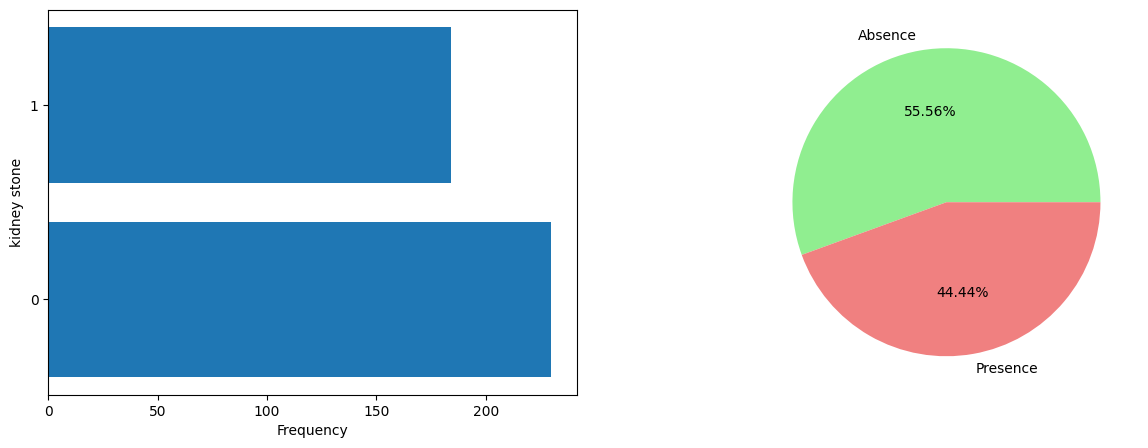

In [ ]:
#Смотрим на соотношение больных и здоровых в наших данных
target=data['target'].value_counts()
colors=["lightgreen",'lightcoral']
figure, axes=plt.subplots(1,2, figsize=(15,5))

axes[0].barh(y=target.index.astype(str), width=target.values, color=colors)
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('kidney stone')

axes[1].pie(target.values, labels=["Absence", "Presence"], colors=colors, autopct='%.2f%%')
plt.show()

In [ ]:
from scipy.stats import shapiro, levene

In [ ]:
#группируем данные по признаку target. 0 - здоровые, 1 - больные
target= data.groupby('target')
print(target.get_group(0))
print(target.get_group(1))

      id  gravity    ph  osmo  cond  urea  calc  target
0      0    1.013  6.19   443  14.8   124  1.45       0
1      1    1.025  5.40   703  23.6   394  4.18       0
2      2    1.009  6.13   371  24.5   159  9.04       0
7      7    1.015  5.53   450   8.1   170  1.16       0
8      8    1.025  7.38   736  25.3   418  1.52       0
..   ...      ...   ...   ...   ...   ...   ...     ...
405  405    1.005  6.13   225   9.9    72  1.16       0
406  406    1.014  5.85   577  20.9   212  3.53       0
409  409    1.011  5.21   527  21.4    75  1.53       0
410  410    1.024  5.53   577  19.7   224  0.77       0
413  413    1.011  6.13   364   9.9   159  0.27       0

[230 rows x 8 columns]
      id  gravity    ph  osmo  cond  urea  calc  target
3      3    1.021  4.91   442  20.8   398  6.63       1
4      4    1.021  5.53   874  17.8   385  2.21       1
5      5    1.025  6.90   947  28.4   395  2.64       1
6      6    1.008  5.09   371  15.5   159  2.17       1
9      9    1.017  6.61 

Создаем функцию, которая проверяет предположения о нормальности и равной дисперсии для независимого T-теста.

In [ ]:
def check(feature):
  target= data.groupby('target')
  helthy=target.get_group(0)
  kidneystone=target.get_group(1)

#isna() выдает True, если значения нет, ставим ~ чтобы сделать реверс. Получаем True там, где данные в столбце есть.
  helthy=helthy[~helthy[feature].isna()]
  kidneystone=kidneystone[~kidneystone[feature].isna()]

  print("Предположение нормальности:")

  stat, pvalue= shapiro(helthy[feature])
  print("Здоровые:")
  print("Test statistic", stat)
  print("p-value", pvalue)

  if pvalue>0.05:
    print(f'{feature} здоровой группы нормально распределена')
  else:
    print(f'{feature} здоровой группы распределена не нормально')

  stat, pvalue= shapiro(kidneystone[feature])
  print("Больные:")
  print("Test statistic", stat)
  print("p-value", pvalue)

  if pvalue>0.05:
    print(f'{feature} больной группы нормально распределена')
  else:
    print(f'{feature} больной группы распределена не нормально')


  stat,pvalue=levene(helthy[feature], kidneystone[feature])
  print(f'Levene test statistic: {stat}, p-value: {pvalue}')

  if pvalue>0.05:
    print(f'Однородные')
  else:
    print(f'Различия в {feature} между группами не однородны')


In [ ]:
check('ph')

Предположение нормальности:
Здоровые:
Test statistic 0.9355683326721191
p-value 1.634083801604902e-08
ph здоровой группы распределена не нормально
Больные:
Test statistic 0.9083959460258484
p-value 2.853449032613753e-09
ph больной группы распределена не нормально
Levene test statistic: 2.853943455915493, p-value: 0.0919066473053468
Однородные


In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu

Создаем функцию, которая выполняет статистический тест (test=0 для проведения независимого T-теста, test=1 для проведения U-теста Манна-Уитни)

In [ ]:
def stattest(feature, test):
  figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
  sns.histplot(data=data, x=data[feature], hue=data['target'], palette=colors, ax=axes[0])
  axes[0].grid(alpha=0.4)
  sns.boxplot(data=data, x=data['target'], y=data[feature], palette=colors, ax=axes[1])
  axes[1].set_xlabel('Kidney Stone')
  axes[1].grid(alpha=0.4)
  plt.show()

#Отображение сводной статистики между двумя группами
  target=data.groupby('target')
  healthy=target.get_group(0)
  kidneystone=target.get_group(1)
  display(target[feature].describe())


  healthyy=healthy[~healthy[feature].isna()]
  kidneystone=kidneystone[~kidneystone[feature].isna()]

  if test ==0:
    res=ttest_ind(healthy[feature], kidneystone[feature])
  else:
    res=mannwhitneyu(healthy[feature], kidneystone[feature])



  test_stat=round(res[0],4)
  pvalue=round(res[1],4)

  print('Test statistics', test_stat)
  print("test p-value", pvalue)

#Интерпретация результатов
  if pvalue< 0.05:
    print(f"Отклонить нулевую гипотезу")
  else:
    print(f"Не удалось отвергнуть нулевую гипотезу")


Проверяем каждый признак на нормальность распределения и отвечаем на вопрос "Существует ли статистически значимая разница в {feature} у людей с камнями в почках и без них?"

In [ ]:
check('gravity')

Предположение нормальности:
Здоровые:
Test statistic 0.9475693702697754
p-value 2.222337087687265e-07
gravity здоровой группы распределена не нормально
Больные:
Test statistic 0.9690424799919128
p-value 0.000419522199081257
gravity больной группы распределена не нормально
Levene test statistic: 8.356112258006391, p-value: 0.00404726738175875
Различия в gravity между группами не однородны


<ipython-input-25-276424d4589e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=data['target'], y=data[feature], palette=colors, ax=axes[1])


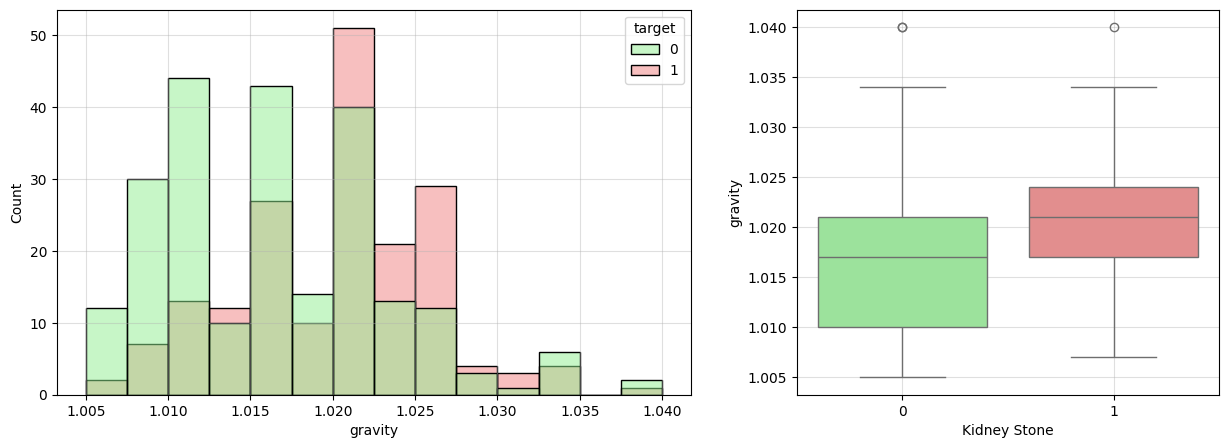

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,230.0,1.016209,0.006853,1.005,1.010,1.017,1.021,1.04
1,184.0,1.020000,0.005809,1.007,1.017,1.021,1.024,1.04


Test statistics 13461.0
test p-value 0.0
Отклонить нулевую гипотезу


In [ ]:
stattest('gravity',1)

Предположение нормальности:
Здоровые:
Test statistic 0.9355683326721191
p-value 1.634083801604902e-08
ph здоровой группы распределена не нормально
Больные:
Test statistic 0.9083959460258484
p-value 2.853449032613753e-09
ph больной группы распределена не нормально
Levene test statistic: 2.853943455915493, p-value: 0.0919066473053468
Однородные


<ipython-input-25-276424d4589e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=data['target'], y=data[feature], palette=colors, ax=axes[1])


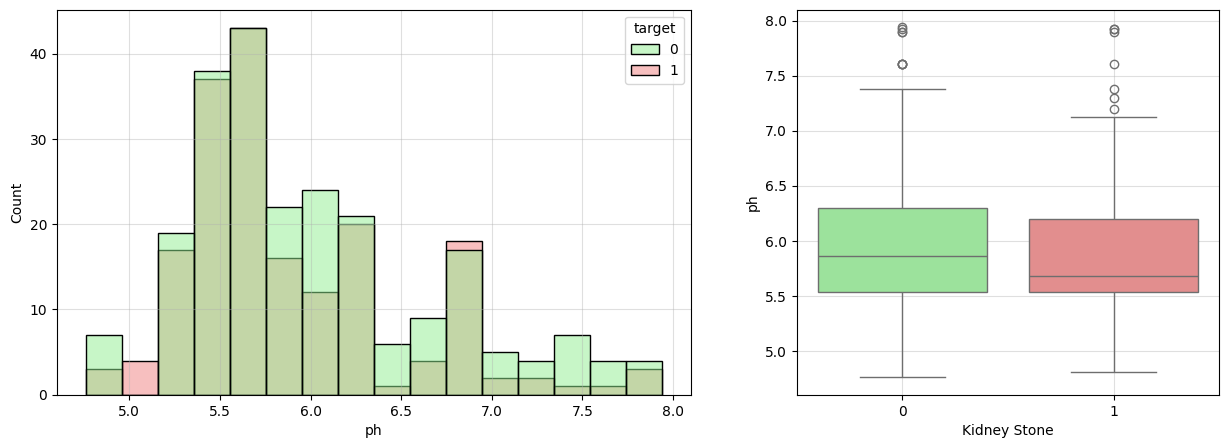

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,230.0,6.009957,0.669351,4.76,5.53,5.86,6.2975,7.94
1,184.0,5.887337,0.601572,4.81,5.53,5.68,6.1950,7.92


Test statistics 23457.0
test p-value 0.0575
Не удалось отвергнуть нулевую гипотезу


In [ ]:
check('ph')
stattest('ph',1)

Предположение нормальности:
Здоровые:
Test statistic 0.9685226678848267
p-value 5.5170225095935166e-05
osmo здоровой группы распределена не нормально
Больные:
Test statistic 0.9751547574996948
p-value 0.0022866304498165846
osmo больной группы распределена не нормально
Levene test statistic: 2.73509094279059, p-value: 0.09892757319648053
Однородные


<ipython-input-25-276424d4589e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=data['target'], y=data[feature], palette=colors, ax=axes[1])


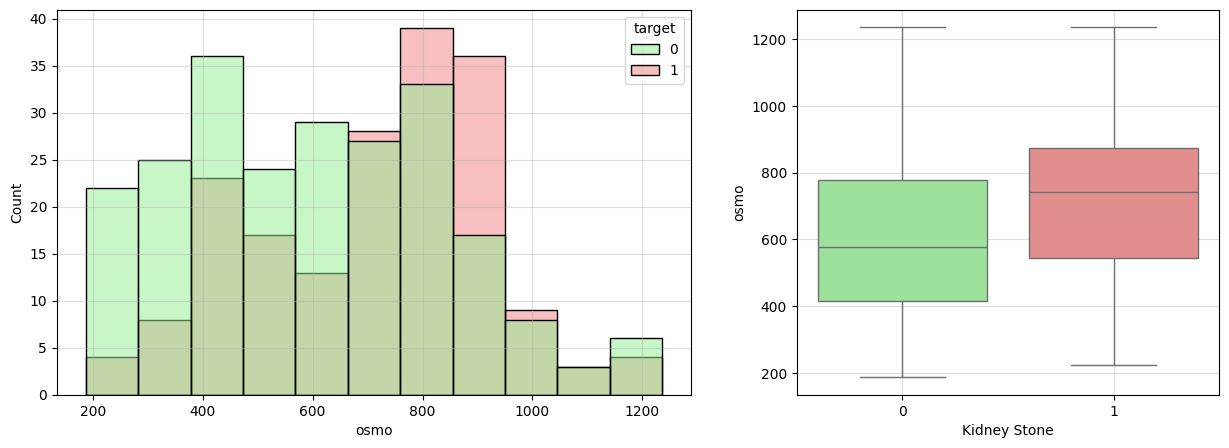

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,230.0,600.230435,239.357973,187.0,416.0,577.0,779.0,1236.0
1,184.0,715.690217,212.486494,225.0,543.0,742.5,874.0,1236.0


Test statistics 14888.5
test p-value 0.0
Отклонить нулевую гипотезу


In [ ]:
check('osmo')
stattest('osmo',1)

Предположение нормальности:
Здоровые:
Test statistic 0.960761547088623
p-value 6.007906449667644e-06
cond здоровой группы распределена не нормально
Больные:
Test statistic 0.9624778032302856
p-value 7.835001451894641e-05
cond больной группы распределена не нормально
Levene test statistic: 22.20249181255441, p-value: 3.3606247471949583e-06
Различия в cond между группами не однородны


<ipython-input-25-276424d4589e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=data['target'], y=data[feature], palette=colors, ax=axes[1])


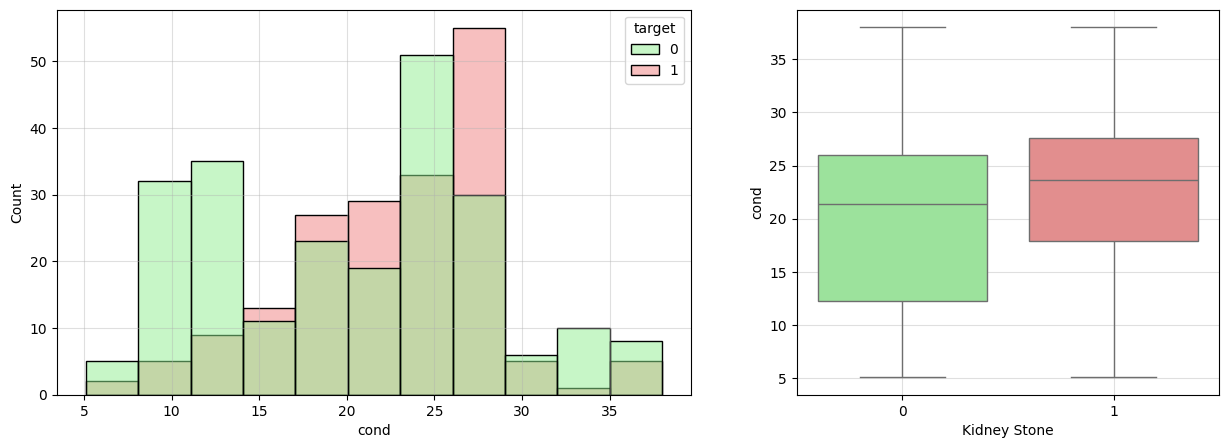

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,230.0,20.281739,8.214383,5.1,12.25,21.4,26.0,38.0
1,184.0,22.883152,6.263311,5.1,17.90,23.6,27.6,38.0


Test statistics 17007.5
test p-value 0.0006
Отклонить нулевую гипотезу


In [ ]:
check('cond')
stattest('cond',1)

Предположение нормальности:
Здоровые:
Test statistic 0.9363980889320374
p-value 1.938156835024074e-08
urea здоровой группы распределена не нормально
Больные:
Test statistic 0.9837003946304321
p-value 0.030750038102269173
urea больной группы распределена не нормально
Levene test statistic: 1.87520443927498, p-value: 0.17162615998938713
Однородные


<ipython-input-25-276424d4589e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=data['target'], y=data[feature], palette=colors, ax=axes[1])


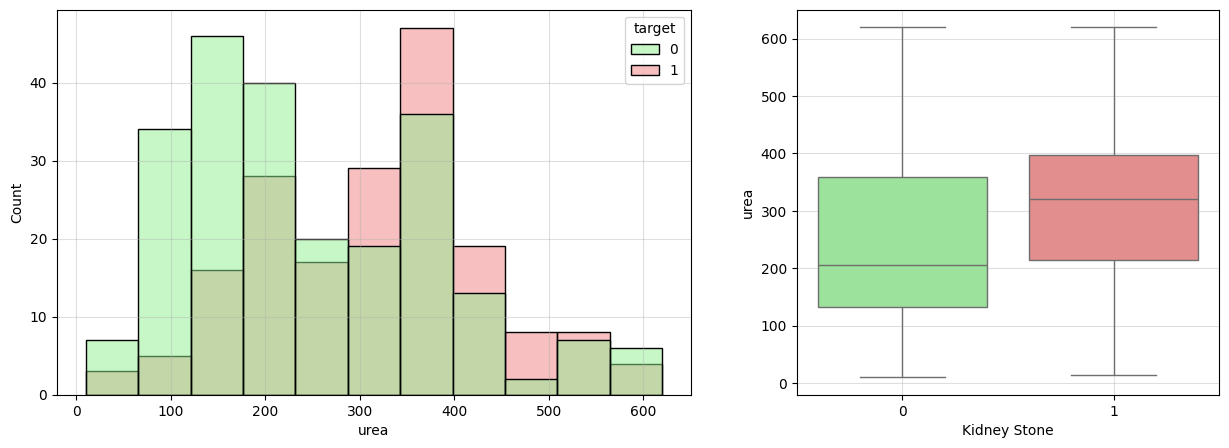

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,230.0,246.330435,137.926613,10.0,133.0,205.5,358.5,620.0
1,184.0,319.065217,123.504811,14.0,214.0,321.0,396.5,620.0


Test statistics 14154.0
test p-value 0.0
Отклонить нулевую гипотезу


In [ ]:
check('urea')
stattest('urea',1)

С помощью heatmap и pairplot отвечаем на вопрос "Какие функции в наборе данных демонстрируют сильную корреляцию с целевой меткой?"

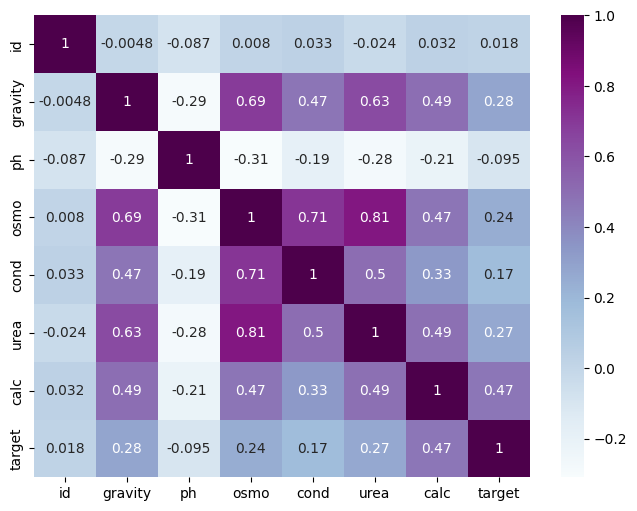

In [ ]:
correlation=data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='BuPu')
plt.show()

<Figure size 640x480 with 0 Axes>

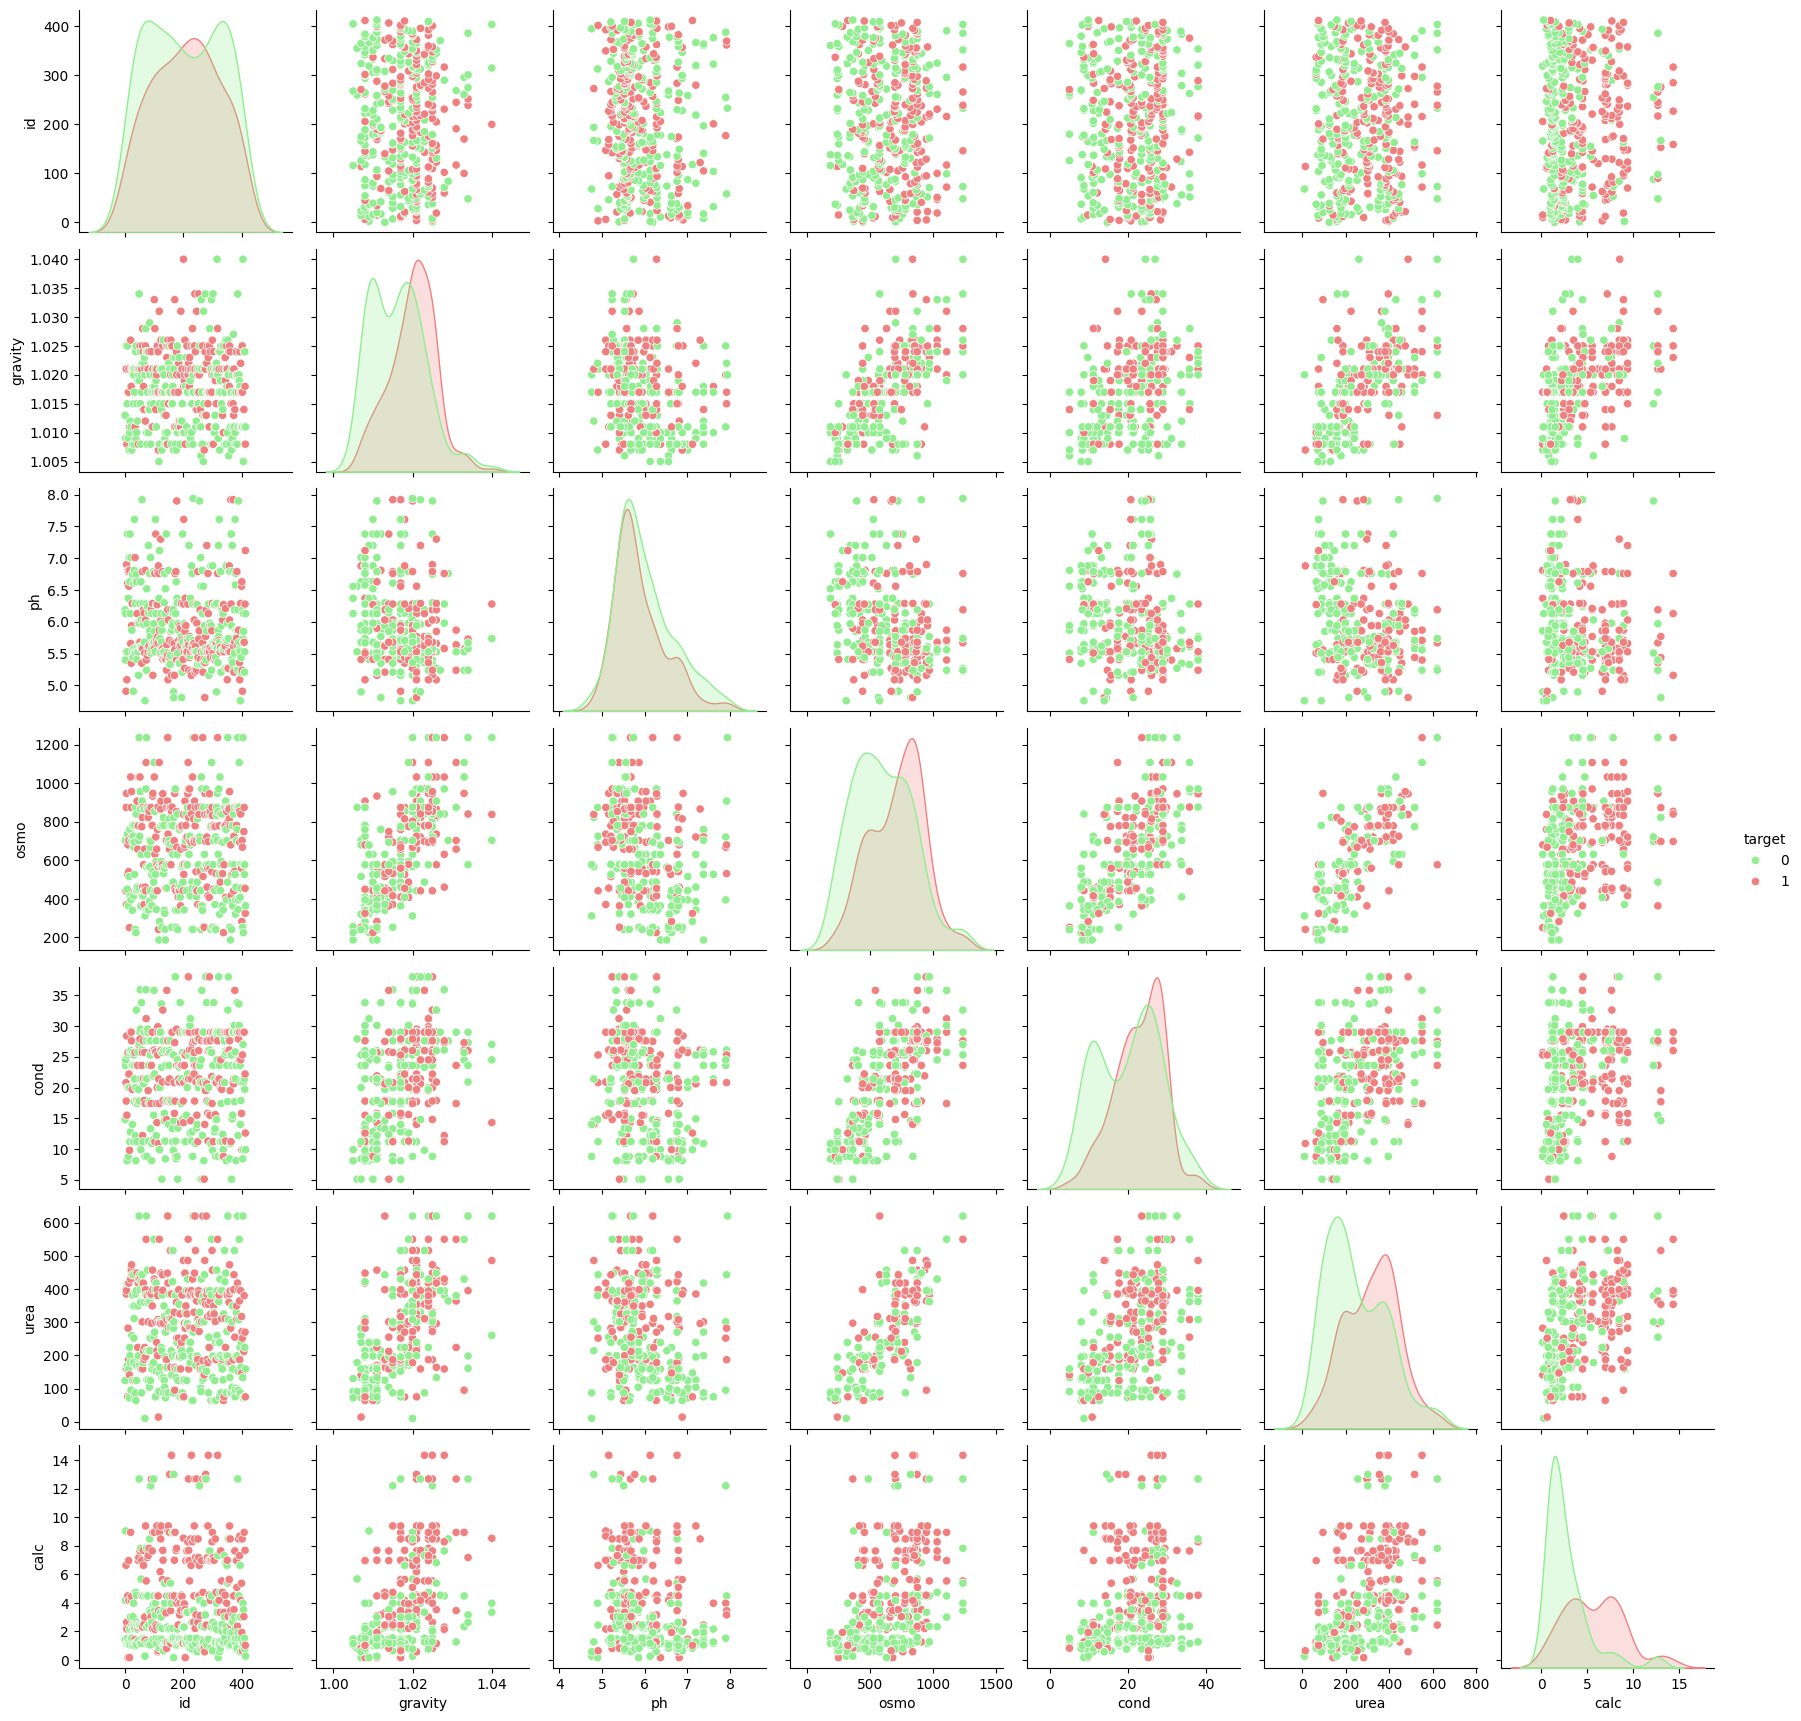

In [ ]:
plt.figure()
sns.pairplot(data=data, hue="target", palette=colors) #можно добавить сюда "corner=True", чтобы убрать симметричное отображение графиков и "markers=['o','s']", чтобы помимо цвета, точки различались еще и формой для большей наглядности
plt.show()

gravity – удельный вес
ph - pH мочи
osmo – осмолярность мочи
cond - проводимость мочи
urea - концентрация мочевины в моче (ммоль/л)
Calc - концентрация кальция в моче (ммоль/л)
target – камень в почках;
 0: отсутствие камня, 1: наличие камня


### Практика 2

In [ ]:
print("дубликаты", data[data.duplicated()])

дубликаты Empty DataFrame
Columns: [id, gravity, ph, osmo, cond, urea, calc, target]
Index: []


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


In [ ]:
data=data.drop("id", axis=1)

IndexError: index 6 is out of bounds for axis 0 with size 6

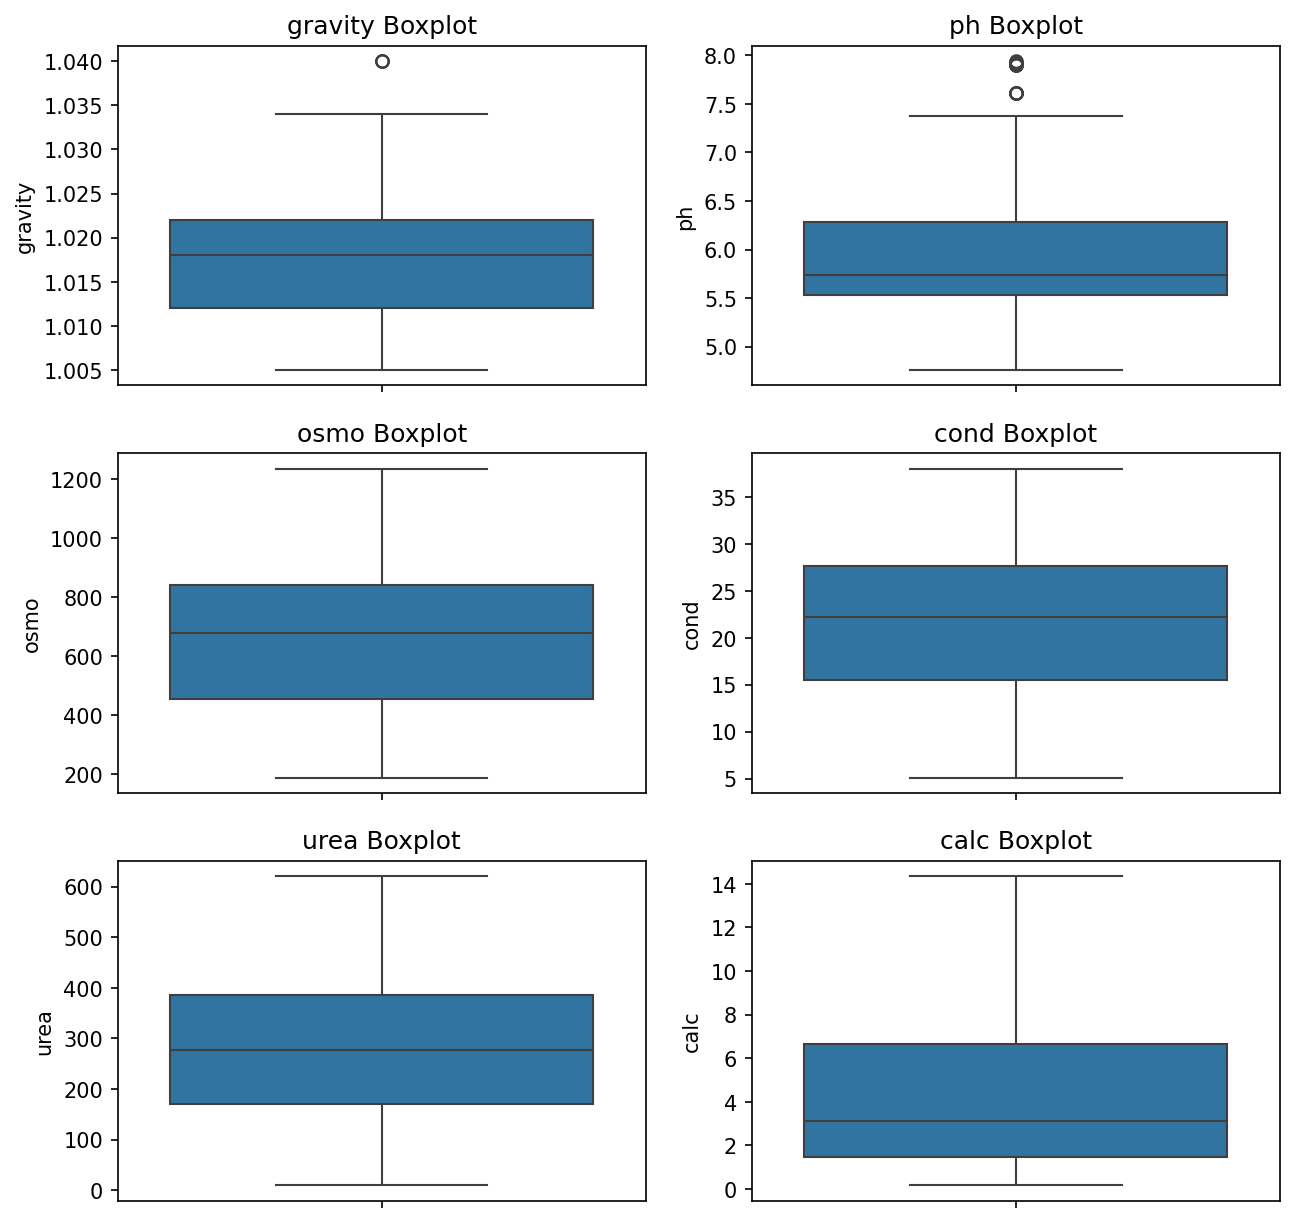

In [ ]:
columns=data.columns.tolist()
fig, ax= plt.subplots(3,2, figsize=(10,10), dpi=150)

ax=ax.flatten()

for i in columns:
  sns.boxplot(data[i], ax=ax[columns.index(i)])
  ax[columns.index(i)].set_title(f"{i} Boxplot")

plt.tight_layout()

In [ ]:
def treat_outliers(data, factor=1.5):
  q1=np.percentile(data, 25)
  q3=np.percentile(data, 75)
  iqr=q3-q1
  lower_bound=q1-(iqr*factor)
  upper_bound=q3+(iqr*factor)

  treated_data=data.copy()
  treated_data[(data< lower_bound)| (data>upper_bound)]= np.nan

  return treated_data

In [ ]:
treated_data=treat_outliers(data)

In [ ]:
treated_data.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.013,6.19,NaN,14.8,124.0,1.45,0
1,1.025,5.40,NaN,23.6,394.0,4.18,0
2,1.009,6.13,371.0,24.5,159.0,9.04,0
3,1.021,4.91,NaN,20.8,398.0,6.63,1
4,1.021,5.53,NaN,17.8,385.0,2.21,1


In [ ]:
treated_data.isna().sum()

gravity      0
ph           0
osmo       335
cond         0
urea        60
calc         0
target       0
dtype: int64

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from os.path import join
from sklearn.neighbors import (KNeighborsRegressor,
                               KNeighborsClassifier)
from sklearn.metrics import (r2_score,
                             mean_squared_error,
                             mean_absolute_error,
                             accuracy_score)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler,
                                   OneHotEncoder,
                                   LabelEncoder)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from PIL import Image